# Lab 7 - Dynamic Programming - Power Plant

Information on group members:

1) 136633, Marek Szydłowski <br>
2) 145464, Jan Gruszczyński

In [109]:
%matplotlib inline

from sympy.interactive import printing
printing.init_printing(use_latex=True)

import matplotlib.pyplot as plt
import sympy as sym
from sympy import *
import numpy as np

This exercise is inspired by Ex. 2 in the Exercises.pdf file. You have to set operating levels for a power plant for consecutive two-months in a way that minimizes the operating costs (using dynamic programming). Before going to the exercise, it is recommended to get acquainted with a Python library for symbolic calculations - SymPy, which can be particularly helpful for solving this task. 

# Mini tutorial on SymPy

SymPy is a library for performing symbolic calculations instead of numerical. It allows defining symbols, functions, expressions, equations and performing various operations on them. The examples of such operations that can help solve this exercise are given below. Note that due to lines: <br><br>
from sympy.interactive import printing <br>
printing.init_printing(use_latex=True)  <br><br>
located in the first cell of this notebook, the symbols can be printed using latex, improving hence readability

<b> Defining symbols: </b>

In [110]:
z1, z2 = symbols("z1 z2")
# or z = symbols("z1 z2")

<b> Printing a symbol using Latex: </b>

In [111]:
z1

<b> Defining an expression: </b>

In [112]:
2*z1 + (10-z2)**2

<b>Expanding the expression:</b>

In [113]:
expand(2*z1 + (10-z2)**2)

<b> Simplifying the expression:</b>

In [114]:
e = simplify(expand(2*z1 + (10-z2)**2 - (5+z1)**2))
e

<b> Substituting a variable with a value in the expression:</b>

In [115]:
e = 2*z1 + (10-z1)**2
v = e.evalf(subs={z1: 10})
print(v)

20.0000000000000


<b> Substituting a variable with another variable or value:</b>

In [116]:
e = 2*z1 + (10-z2)**2
e.subs(z2, z1)

<b> Finding a (partial) derivative: </b>

In [117]:
e = 2*z1 + (10-z2)**2
d = diff(e, z2)
d

<b> Solving an equation: </b>

In [118]:
e = 2*z1 + (10-z2)**2
d = diff(e, z2)
v = solve(Eq(d, 0), z2)
print(v)

[10]


# Exercise

Below given is the data. In contrast to the exercise shown in the Exercise.pdf file, note that all pairs of all 12 months are considered stages in this notebook. 

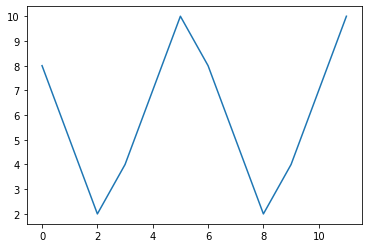

In [119]:
months = ["Jan-Feb", "Mar-Apr", "May-Jun", "Jul-Aug", "Sep-Oct", "Nov-Dec"]

### min requested operating level (1-10) + allowable bounds 
request = [8,5,2,4,7,10]
bounds = [[request[i], 10] for i in range(6)]
bounds.reverse() #Reversing bounds

plt.plot([i for i in range(12)], request + request, label='linear')
plt.show()

<b> Cost: </b> Working above the required level - cost in a generic form:

In [120]:
xi, ri, mi1 = symbols("x_i r_i m_{i1}") 
cost_above = mi1*(xi-ri)
cost_above #mi1 = multiplicator, #xi = operating level #ri = requirement (lower bound)

You can do c = cost_above.copy() and then c.subs, replacing variables with values (m, p, r) or other variables (r): 

In [121]:
x1 = symbols("x1") 
c = cost_above.copy()
c = c.subs(xi, x1)
c = c.subs(mi1, 1)
c = c.subs(ri, 100)
c

Below are provided m parameter values for each month:

In [122]:
mv1 = [2, 8, 10, 12, 10, 6 ]
mv1.reverse()

<b> Cost: </b> Chaging the operating level - cost in a generic form:

In [123]:
si, mi2, pi = symbols("s_{i} m_{i2} p_i") 
cost_change = mi2*(xi-si)**pi
cost_change #mi2 = multiplicator, #pi = exponent #xi = operating level (i-th month) #s_{i} = state: operating level ((i-1)-th month)
cost_change

Below are provided m and p parameter values for each month:

In [124]:
mv2 = [6, 4, 1, 1, 3, 5]
mv2.reverse()
pv = [2, 2, 2, 2, 2, 2]
pv.reverse()

# Solution:

Apart from finding optimal operating levels for each month, plot these values along with the lower bounds for each month in order to show how they change in time.<br><br>Hints:<br>
- the optimal cost = 135.42<br>
- there is no situation when the minima for first derivatives are outside allowable bounds (but test it anyway)<br><br>

After obtaining and plotting the solution, check what would happen is you change the mv1[2] parameter to 5. 

In [180]:
from IPython.display import display

function_to_be_optimized = cost_above + cost_change

s_2 = symbols("s_{2}")
s_3 = symbols("s_{3}")
s_4 = symbols("s_{4}")
s_5 = symbols("s_{5}")
s_6 = symbols("s_{6}")

symbols_list = [s_6, s_5, s_4, s_3, s_2, None]

iterations = [6, 5, 4, 3, 2, 1]
bounds_counter = 1
symbol_counter = 0
optimals = []
for iteration, m_1, m_2, p_value, bounds_values in zip(iterations, mv1, mv2, pv, bounds):
    if iteration == 6:
        first_equation = function_to_be_optimized.copy()
        display(first_equation)
        first_equation = first_equation.subs(mi1, m_1)
        first_equation = first_equation.subs(mi2, m_2)
        first_equation = first_equation.subs(pi, p_value)
        first_equation = first_equation.subs(ri, bounds_values[0])
        first_equation = first_equation.subs(si, symbols_list[symbol_counter])
        symbol_counter += 1
        first_equation = first_equation.subs(xi, 10)  # Because minimum operating level at this stage is equal to max of all values so this is 10
        display(first_equation)

        optimals.append(10)
    else:
        print("-----")
        new_part_of_equation = function_to_be_optimized.copy()
        if iteration == 5:
            new_part_of_equation = new_part_of_equation + first_equation
        else:
            new_part_of_equation = new_part_of_equation + old_part_of_equation
        display(new_part_of_equation)
        new_part_of_equation = new_part_of_equation.subs(symbols_list[symbol_counter - 1], xi)
        new_part_of_equation = new_part_of_equation.subs(mi1, m_1)
        new_part_of_equation = new_part_of_equation.subs(mi2, m_2)
        new_part_of_equation = new_part_of_equation.subs(pi, p_value)
        new_part_of_equation = new_part_of_equation.subs(ri, bounds_values[0])
        if iteration == 1:
            new_part_of_equation = new_part_of_equation.subs(si, 10)
            derrivative_ = diff(new_part_of_equation, xi)
            solved_derivative = solve(Eq(derrivative_, 0), xi)
            x1 = solved_derivative.copy()
            optimals.append(x1[0])
            new_part_of_equation = new_part_of_equation.subs(xi, x1[0].evalf())
            display(new_part_of_equation)
            break

        derrivative_ = diff(new_part_of_equation, xi)
        solved_derivative_ = solve(Eq(derrivative_, 0), xi)
        optimals.append(solved_derivative_)
        second_derivative = diff(derrivative_, xi)  # > 0
        if second_derivative < 0:
            print("Error second derivative is not greater or equal to 0")
        new_part_of_equation = simplify(expand(new_part_of_equation.subs(xi, solved_derivative_[0])))
        new_part_of_equation = new_part_of_equation.subs(si, symbols_list[symbol_counter])
        symbol_counter += 1
        old_part_of_equation = new_part_of_equation
        display(new_part_of_equation)

        w1 = solved_derivative_[0].subs(si, bounds[bounds_counter + 1][0])
        w2 = solved_derivative_[0].subs(si, bounds[bounds_counter + 1][1])
        bounds_counter += 1

        if w1 < bounds_values[0] or w2 > bounds_values[1]:
            print("Error, out of bounds.")
            break
optimals.reverse()
solutions = []
for id_, sol in enumerate(optimals):
    if id_ == 0:
        print("X_1 = ", sol)
        old_value = sol
        solutions.append(old_value)
    elif id_ == 5:
        print("X_6 = ", sol)
        solutions.append(sol)
    else:
        value = sol[0].subs(si, old_value)
        solutions.append(value)
        print(f"X_{id_ + 1} = ", value)
        old_value = value

-----


-----


-----


-----


-----


X_1 =  9133/1062
X_2 =  3584/531
X_3 =  1778/531
X_4 =  2627/531
X_5 =  1324/177
X_6 =  10


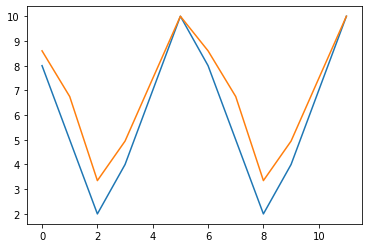

In [177]:
request = [8,5,2,4,7,10]
bounds = [[request[i], 10] for i in range(6)]
bounds.reverse()

plt.plot([i for i in range(12)], request + request, label='linear')
plt.plot([i for i in range(12)], solutions + solutions, label='linear')
plt.show()

In [181]:
mv1[2] = 5

function_to_be_optimized = cost_above + cost_change

s_2 = symbols("s_{2}")
s_3 = symbols("s_{3}")
s_4 = symbols("s_{4}")
s_5 = symbols("s_{5}")
s_6 = symbols("s_{6}")

symbols_list = [s_6, s_5, s_4, s_3, s_2, None]

iterations = [6, 5, 4, 3, 2, 1]
bounds_counter = 1
symbol_counter = 0
optimals = []
for iteration, m_1, m_2, p_value, bounds_values in zip(iterations, mv1, mv2, pv, bounds):
    if iteration == 6:
        first_equation = function_to_be_optimized.copy()
        display(first_equation)
        first_equation = first_equation.subs(mi1, m_1)
        first_equation = first_equation.subs(mi2, m_2)
        first_equation = first_equation.subs(pi, p_value)
        first_equation = first_equation.subs(ri, bounds_values[0])
        first_equation = first_equation.subs(si, symbols_list[symbol_counter])
        symbol_counter += 1
        first_equation = first_equation.subs(xi,
                                             10)  # Because minimum operating level at this stage is equal to max of all values so this is 10
        display(first_equation)

        optimals.append(10)
    else:
        print("-----")
        new_part_of_equation = function_to_be_optimized.copy()
        if iteration == 5:
            new_part_of_equation = new_part_of_equation + first_equation
        else:
            new_part_of_equation = new_part_of_equation + old_part_of_equation
        display(new_part_of_equation)
        new_part_of_equation = new_part_of_equation.subs(symbols_list[symbol_counter - 1], xi)
        new_part_of_equation = new_part_of_equation.subs(mi1, m_1)
        new_part_of_equation = new_part_of_equation.subs(mi2, m_2)
        new_part_of_equation = new_part_of_equation.subs(pi, p_value)
        new_part_of_equation = new_part_of_equation.subs(ri, bounds_values[0])
        if iteration == 1:
            new_part_of_equation = new_part_of_equation.subs(si, 10)
            derrivative_ = diff(new_part_of_equation, xi)
            solved_derivative = solve(Eq(derrivative_, 0), xi)
            x1 = solved_derivative.copy()
            optimals.append(x1[0])
            new_part_of_equation = new_part_of_equation.subs(xi, x1[0].evalf())
            display(new_part_of_equation)
            break

        derrivative_ = diff(new_part_of_equation, xi)
        solved_derivative_ = solve(Eq(derrivative_, 0), xi)
        optimals.append(solved_derivative_)
        second_derivative = diff(derrivative_, xi)  # > 0
        if second_derivative < 0:
            print("Error second derivative is not greater or equal to 0")
        new_part_of_equation = simplify(expand(new_part_of_equation.subs(xi, solved_derivative_[0])))
        new_part_of_equation = new_part_of_equation.subs(si, symbols_list[symbol_counter])
        symbol_counter += 1
        old_part_of_equation = new_part_of_equation
        display(new_part_of_equation)

        w1 = solved_derivative_[0].subs(si, bounds[bounds_counter + 1][0])
        w2 = solved_derivative_[0].subs(si, bounds[bounds_counter + 1][1])
        bounds_counter += 1

        if w1 < bounds_values[0] or w2 > bounds_values[1]:
            print("Error, out of bounds.")
            break
optimals.reverse()
solutions = []
for id_, sol in enumerate(optimals):
    if id_ == 0:
        print("X_1 = ", sol)
        old_value = sol
        solutions.append(old_value)
    elif id_ == 5:
        print("X_6 = ", sol)
        solutions.append(sol)
    else:
        value = sol[0].subs(si, old_value)
        solutions.append(value)
        print(f"X_{id_ + 1} = ", value)
        old_value = value

-----


-----


-----


-----


-----


X_1 =  9245/1062
X_2 =  3724/531
X_3 =  2254/531
X_4 =  3439/531
X_5 =  2851/354
X_6 =  10


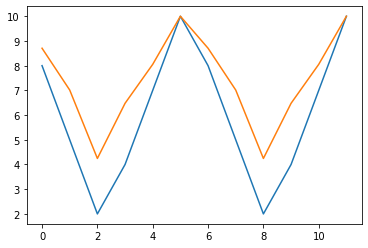

In [182]:
request = [8,5,2,4,7,10]
bounds = [[request[i], 10] for i in range(6)]
bounds.reverse()

plt.plot([i for i in range(12)], request + request, label='linear')
plt.plot([i for i in range(12)], solutions + solutions, label='linear')
plt.show()